<a href="https://colab.research.google.com/github/Foulach/project_an/blob/main/D%C3%A9bats_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import xml.etree.ElementTree as ET
import pandas as pd
import os

# Specify the folder path where the XML files are stored
folder_path = '/content/drive/MyDrive/Project Le Wagon/DATA imported/Compte rendu débats/Compte rendu débats/compteRendu'

# Initialize lists to hold the aggregated data
speakers = []
roles = []
texts = []

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xml'):
        # Full path to the XML file
        file_path = os.path.join(folder_path, file_name)

        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Define the namespace
        ns = {'ns': 'http://schemas.assemblee-nationale.fr/referentiel'}

        # Extract data from each XML file
        for point in root.findall('.//ns:point', ns):
            for paragraph in point.findall('.//ns:paragraphe', ns):
                for orator in paragraph.findall('.//ns:orateurs/ns:orateur', ns):
                    name = orator.find('ns:nom', ns).text
                    role = orator.find('ns:qualite', ns).text if orator.find('ns:qualite', ns) is not None else ''
                    text_elements = paragraph.findall('.//ns:texte', ns)
                    text = ' '.join([el.text for el in text_elements if el.text is not None])
                    speakers.append(name)
                    roles.append(role)
                    texts.append(text)

# Create a DataFrame from the aggregated data
df = pd.DataFrame({
    'Speaker': speakers,
    'Role': roles,
    'Text': texts
})

# Display the DataFrame
print(df)


                             Speaker  \
0                    M. le président   
1                    M. le président   
2                    M. Bruno Studer   
3             M. Éric Dupond-Moretti   
4                    M. Bruno Studer   
...                              ...   
166232  Mme Sabrina Agresti-Roubache   
166233             M. Sébastien Rome   
166234  Mme Sabrina Agresti-Roubache   
166235             Mme la présidente   
166236             Mme la présidente   

                                                     Role  \
0                                                    None   
1                                                    None   
2       rapporteur de la commission des lois constitut...   
3                garde des sceaux, ministre de la justice   
4                                              rapporteur   
...                                                   ...   
166232                                  secrétaire d’État   
166233                         

In [15]:
!pip install nltk
import xml.etree.ElementTree as ET
import pandas as pd
import os
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt') # Download the 'punkt' resource for sentence tokenization

# Specify the folder path where the XML files are stored
folder_path = '/content/drive/MyDrive/Project Le Wagon/DATA imported/Compte rendu débats/Compte rendu débats/compteRendu'

# Initialize lists to hold the aggregated data
speakers = []
roles = []
texts = []

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xml'):
        # Full path to the XML file
        file_path = os.path.join(folder_path, file_name)

        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Define the namespace
        ns = {'ns': 'http://schemas.assemblee-nationale.fr/referentiel'}

        # Extract data from each XML file
        for point in root.findall('.//ns:point', ns):
            for paragraph in point.findall('.//ns:paragraphe', ns):
                for orator in paragraph.findall('.//ns:orateurs/ns:orateur', ns):
                    name = orator.find('ns:nom', ns).text
                    role = orator.find('ns:qualite', ns).text if orator.find('ns:qualite', ns) is not None else ''
                    text_elements = paragraph.findall('.//ns:texte', ns)
                    text = ' '.join([el.text for el in text_elements if el.text is not None])
                    speakers.append(name)
                    roles.append(role)
                    texts.append(text)

# Create a DataFrame from the aggregated data
df = pd.DataFrame({
    'Speaker': speakers,
    'Role': roles,
    'Text': texts
})

# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Text'])

# Perform K-Means clustering
num_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Display the DataFrame with cluster labels
print(df[['Speaker', 'Role', 'Text', 'Cluster']])

# Analyze the clusters
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    cluster_data = df[df['Cluster'] == i]
    print(cluster_data[['Speaker', 'Role', 'Text']])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                             Speaker  \
0                    M. le président   
1                    M. le président   
2                    M. Bruno Studer   
3             M. Éric Dupond-Moretti   
4                    M. Bruno Studer   
...                              ...   
166232  Mme Sabrina Agresti-Roubache   
166233             M. Sébastien Rome   
166234  Mme Sabrina Agresti-Roubache   
166235             Mme la présidente   
166236             Mme la présidente   

                                                     Role  \
0                                                    None   
1                                                    None   
2       rapporteur de la commission des lois constitut...   
3                garde des sceaux, ministre de la justice   
4                                              rapporteur   
...                                                   ...   
166232                                  secrétaire d’État   
166233                         

In [16]:
print(df[['Speaker', 'Role', 'Text', 'Cluster']])

                             Speaker  \
0                    M. le président   
1                    M. le président   
2                    M. Bruno Studer   
3             M. Éric Dupond-Moretti   
4                    M. Bruno Studer   
...                              ...   
166232  Mme Sabrina Agresti-Roubache   
166233             M. Sébastien Rome   
166234  Mme Sabrina Agresti-Roubache   
166235             Mme la présidente   
166236             Mme la présidente   

                                                     Role  \
0                                                    None   
1                                                    None   
2       rapporteur de la commission des lois constitut...   
3                garde des sceaux, ministre de la justice   
4                                              rapporteur   
...                                                   ...   
166232                                  secrétaire d’État   
166233                         

In [17]:
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    cluster_data = df[df['Cluster'] == i]
    print(cluster_data[['Speaker', 'Role', 'Text']])



Cluster 0:
                  Speaker  Role                                Text
54        M. le président  None  Quel est l’avis de la commission ?
57        M. le président  None   Quel est l’avis du Gouvernement ?
61        M. le président  None  Quel est l’avis de la commission ?
63        M. le président  None   Quel est l’avis du Gouvernement ?
67        M. le président  None  Quel est l’avis de la commission ?
...                   ...   ...                                 ...
166102  Mme la présidente  None   Quel est l’avis du Gouvernement ?
166129  Mme la présidente  None   Quel est l’avis du Gouvernement ?
166142  Mme la présidente  None   Quel est l’avis du Gouvernement ?
166146  Mme la présidente  None   Quel est l’avis du Gouvernement ?
166159  Mme la présidente  None   Quel est l’avis du Gouvernement ?

[13301 rows x 3 columns]

Cluster 1:
                  Speaker  Role  \
302       M. le président  None   
309       M. le président  None   
320       M. le président  No

In [19]:
import xml.etree.ElementTree as ET
import pandas as pd
import os
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Specify the folder path where the XML files are stored
folder_path = '/content/drive/MyDrive/Project Le Wagon/DATA imported/Compte rendu débats/Compte rendu débats/compteRendu'

# Initialize lists to hold the aggregated data
speakers = []
roles = []
texts = []

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xml'):
        # Full path to the XML file
        file_path = os.path.join(folder_path, file_name)

        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Define the namespace
        ns = {'ns': 'http://schemas.assemblee-nationale.fr/referentiel'}

        # Extract data from each XML file
        for point in root.findall('.//ns:point', ns):
            for paragraph in point.findall('.//ns:paragraphe', ns):
                for orator in paragraph.findall('.//ns:orateurs/ns:orateur', ns):
                    name = orator.find('ns:nom', ns).text
                    role = orator.find('ns:qualite', ns).text if orator.find('ns:qualite', ns) is not None else ''
                    text_elements = paragraph.findall('.//ns:texte', ns)
                    text = ' '.join([el.text for el in text_elements if el.text is not None])
                    speakers.append(name)
                    roles.append(role)
                    texts.append(text)

# Create a DataFrame from the aggregated data
df = pd.DataFrame({
    'Speaker': speakers,
    'Role': roles,
    'Text': texts
})

# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Text'])

# Perform K-Means clustering
num_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Display the DataFrame with cluster labels
print(df[['Speaker', 'Role', 'Text', 'Cluster']])

# Analyze the clusters
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    cluster_data = df[df['Cluster'] == i]
    print(cluster_data[['Speaker', 'Role', 'Text']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                             Speaker  \
0                    M. le président   
1                    M. le président   
2                    M. Bruno Studer   
3             M. Éric Dupond-Moretti   
4                    M. Bruno Studer   
...                              ...   
166232  Mme Sabrina Agresti-Roubache   
166233             M. Sébastien Rome   
166234  Mme Sabrina Agresti-Roubache   
166235             Mme la présidente   
166236             Mme la présidente   

                                                     Role  \
0                                                    None   
1                                                    None   
2       rapporteur de la commission des lois constitut...   
3                garde des sceaux, ministre de la justice   
4                                              rapporteur   
...                                                   ...   
166232                                  secrétaire d’État   
166233                         

In [20]:
pip install nltk text2emotion scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 980.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 9.0 MB/s eta 0:00:00


In [22]:
pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [23]:
import xml.etree.ElementTree as ET
import pandas as pd
import os
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Specify the folder path where the XML files are stored
folder_path = '/content/drive/MyDrive/Project Le Wagon/DATA imported/Compte rendu débats/Compte rendu débats/compteRendu'

# Initialize lists to hold the aggregated data
speakers = []
roles = []
texts = []

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xml'):
        # Full path to the XML file
        file_path = os.path.join(folder_path, file_name)

        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Define the namespace
        ns = {'ns': 'http://schemas.assemblee-nationale.fr/referentiel'}

        # Extract data from each XML file
        for point in root.findall('.//ns:point', ns):
            for paragraph in point.findall('.//ns:paragraphe', ns):
                for orator in paragraph.findall('.//ns:orateurs/ns:orateur', ns):
                    name = orator.find('ns:nom', ns).text
                    role = orator.find('ns:qualite', ns).text if orator.find('ns:qualite', ns) is not None else ''
                    text_elements = paragraph.findall('.//ns:texte', ns)
                    text = ' '.join([el.text for el in text_elements if el.text is not None])
                    speakers.append(name)
                    roles.append(role)
                    texts.append(text)

# Create a DataFrame from the aggregated data
df = pd.DataFrame({
    'Speaker': speakers,
    'Role': roles,
    'Text': texts
})

# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Detect emotions in the texts using VADER
def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

df['Sentiment'] = df['Processed_Text'].apply(get_vader_sentiment)

# Convert the sentiment dictionary to separate columns
sentiment_df = pd.json_normalize(df['Sentiment'])
df = pd.concat([df, sentiment_df], axis=1).drop(columns=['Sentiment'])

# Standardize the sentiment scores
scaler = StandardScaler()
sentiment_features = sentiment_df.columns
df[sentiment_features] = scaler.fit_transform(df[sentiment_features])

# Perform K-Means clustering based on sentiment scores
num_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[sentiment_features])

# Display the DataFrame with cluster labels
print(df[['Speaker', 'Role', 'Text', 'Cluster']])

# Analyze the clusters
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    cluster_data = df[df['Cluster'] == i]
    print(cluster_data[['Speaker', 'Role', 'Text']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                             Speaker  \
0                    M. le président   
1                    M. le président   
2                    M. Bruno Studer   
3             M. Éric Dupond-Moretti   
4                    M. Bruno Studer   
...                              ...   
166232  Mme Sabrina Agresti-Roubache   
166233             M. Sébastien Rome   
166234  Mme Sabrina Agresti-Roubache   
166235             Mme la présidente   
166236             Mme la présidente   

                                                     Role  \
0                                                    None   
1                                                    None   
2       rapporteur de la commission des lois constitut...   
3                garde des sceaux, ministre de la justice   
4                                              rapporteur   
...                                                   ...   
166232                                  secrétaire d’État   
166233                         

In [25]:
import xml.etree.ElementTree as ET
import pandas as pd
import os
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Specify the folder path where the XML files are stored
folder_path = '/content/drive/MyDrive/Project Le Wagon/DATA imported/Compte rendu débats/Compte rendu débats/compteRendu'

# Initialize lists to hold the aggregated data
speakers = []
roles = []
texts = []

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xml'):
        # Full path to the XML file
        file_path = os.path.join(folder_path, file_name)

        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Define the namespace
        ns = {'ns': 'http://schemas.assemblee-nationale.fr/referentiel'}

        # Extract data from each XML file
        for point in root.findall('.//ns:point', ns):
            for paragraph in point.findall('.//ns:paragraphe', ns):
                for orator in paragraph.findall('.//ns:orateurs/ns:orateur', ns):
                    name = orator.find('ns:nom', ns).text
                    role = orator.find('ns:qualite', ns).text if orator.find('ns:qualite', ns) is not None else ''
                    text_elements = paragraph.findall('.//ns:texte', ns)
                    text = ' '.join([el.text for el in text_elements if el.text is not None])
                    speakers.append(name)
                    roles.append(role)
                    texts.append(text)

# Create a DataFrame from the aggregated data
df = pd.DataFrame({
    'Speaker': speakers,
    'Role': roles,
    'Text': texts
})

# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Detect emotions in the texts using VADER
def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

df['Sentiment'] = df['Processed_Text'].apply(get_vader_sentiment)

# Convert the sentiment dictionary to separate columns
sentiment_df = pd.json_normalize(df['Sentiment'])
df = pd.concat([df, sentiment_df], axis=1).drop(columns=['Sentiment'])

# Standardize the sentiment scores
scaler = StandardScaler()
sentiment_features = sentiment_df.columns
df[sentiment_features] = scaler.fit_transform(df[sentiment_features])

# Perform K-Means clustering based on sentiment scores
num_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[sentiment_features])

# Display the DataFrame with cluster labels
print(df[['Speaker', 'Role', 'Text', 'Cluster']])

# Analyze the clusters
for i in range(num_clusters):
    print(f"\nCluster {i}:")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                             Speaker  \
0                    M. le président   
1                    M. le président   
2                    M. Bruno Studer   
3             M. Éric Dupond-Moretti   
4                    M. Bruno Studer   
...                              ...   
166232  Mme Sabrina Agresti-Roubache   
166233             M. Sébastien Rome   
166234  Mme Sabrina Agresti-Roubache   
166235             Mme la présidente   
166236             Mme la présidente   

                                                     Role  \
0                                                    None   
1                                                    None   
2       rapporteur de la commission des lois constitut...   
3                garde des sceaux, ministre de la justice   
4                                              rapporteur   
...                                                   ...   
166232                                  secrétaire d’État   
166233                         

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


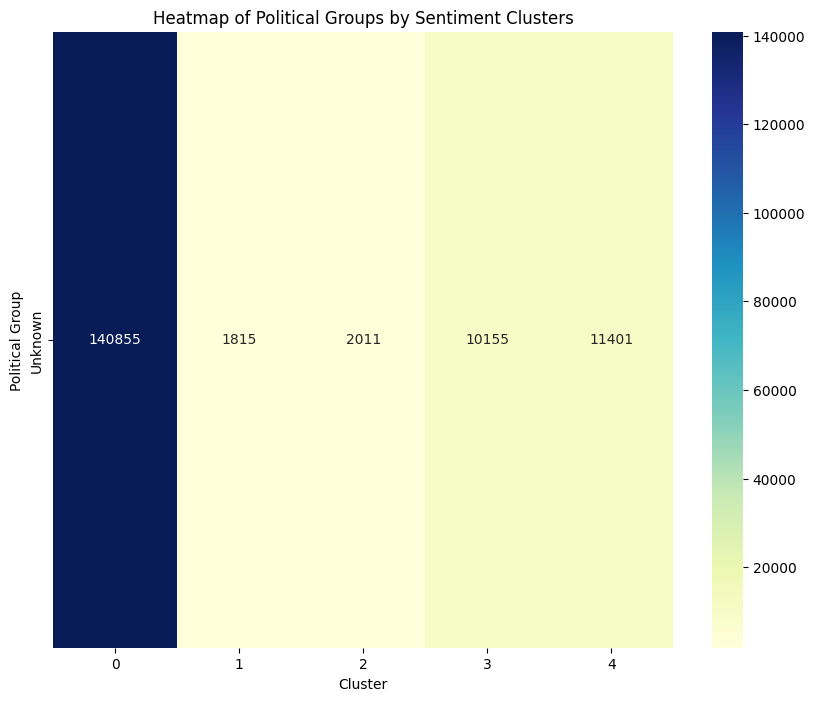

In [26]:
import xml.etree.ElementTree as ET
import pandas as pd
import os
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Specify the folder path where the XML files are stored
folder_path = '/content/drive/MyDrive/Project Le Wagon/DATA imported/Compte rendu débats/Compte rendu débats/compteRendu'

# Initialize lists to hold the aggregated data
speakers = []
roles = []
texts = []
political_groups = []  # Assuming this is available in the XML or needs to be mapped manually

# Sample mapping of speakers to political groups (replace with actual mapping)
speaker_to_political_group = {
    'Speaker A': 'Group 1',
    'Speaker B': 'Group 2',
    'Speaker C': 'Group 3',
    'Speaker D': 'Group 1',
    # Add all speakers and their corresponding political groups
}

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xml'):
        # Full path to the XML file
        file_path = os.path.join(folder_path, file_name)

        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Define the namespace
        ns = {'ns': 'http://schemas.assemblee-nationale.fr/referentiel'}

        # Extract data from each XML file
        for point in root.findall('.//ns:point', ns):
            for paragraph in point.findall('.//ns:paragraphe', ns):
                for orator in paragraph.findall('.//ns:orateurs/ns:orateur', ns):
                    name = orator.find('ns:nom', ns).text
                    role = orator.find('ns:qualite', ns).text if orator.find('ns:qualite', ns) is not None else ''
                    text_elements = paragraph.findall('.//ns:texte', ns)
                    text = ' '.join([el.text for el in text_elements if el.text is not None])
                    speakers.append(name)
                    roles.append(role)
                    texts.append(text)
                    political_groups.append(speaker_to_political_group.get(name, 'Unknown'))

# Create a DataFrame from the aggregated data
df = pd.DataFrame({
    'Speaker': speakers,
    'Role': roles,
    'Text': texts,
    'Political_Group': political_groups
})

# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Detect emotions in the texts using VADER
def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

df['Sentiment'] = df['Processed_Text'].apply(get_vader_sentiment)

# Convert the sentiment dictionary to separate columns
sentiment_df = pd.json_normalize(df['Sentiment'])
df = pd.concat([df, sentiment_df], axis=1).drop(columns=['Sentiment'])

# Standardize the sentiment scores
scaler = StandardScaler()
sentiment_features = sentiment_df.columns
df[sentiment_features] = scaler.fit_transform(df[sentiment_features])

# Perform K-Means clustering based on sentiment scores
num_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[sentiment_features])

# Create a contingency table for the heatmap
heatmap_data = pd.crosstab(df['Political_Group'], df['Cluster'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Political Groups by Sentiment Clusters')
plt.xlabel('Cluster')
plt.ylabel('Political Group')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


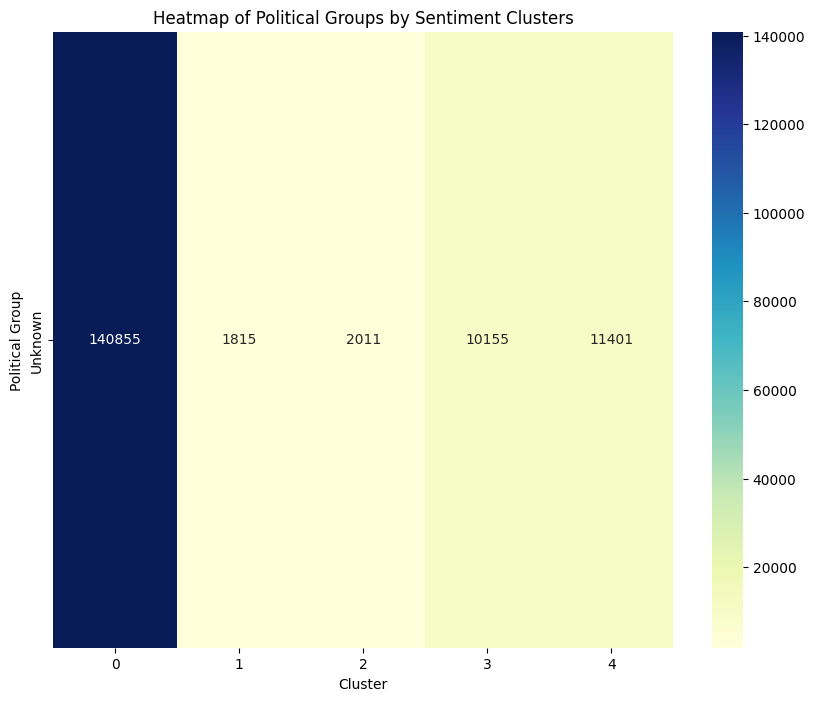

In [30]:
import xml.etree.ElementTree as ET
import pandas as pd
import os
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Specify the folder paths
xml_folder_path = '/content/drive/MyDrive/Project Le Wagon/DATA imported/Compte rendu débats/Compte rendu débats/compteRendu'
csv_path = '/content/drive/MyDrive/Project Le Wagon/DATA imported/Historique députés/historiques acteurs assemblée/liste_rattachement_partis_2024.csv'

# Read the political affiliation data
political_affiliation_df = pd.read_csv(csv_path, encoding='ISO-8859-1', delimiter=';')

# Create a dictionary for mapping full names to their political group
political_affiliation_df['Full_Name'] = political_affiliation_df['prénom'] + ' ' + political_affiliation_df['nom']
speaker_to_political_group = dict(zip(political_affiliation_df['Full_Name'], political_affiliation_df['groupe politique']))

# Initialize lists to hold the aggregated data
speakers = []
roles = []
texts = []
political_groups = []

# Iterate through each file in the XML folder
for file_name in os.listdir(xml_folder_path):
    if file_name.endswith('.xml'):
        # Full path to the XML file
        file_path = os.path.join(xml_folder_path, file_name)

        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Define the namespace
        ns = {'ns': 'http://schemas.assemblee-nationale.fr/referentiel'}

        # Extract data from each XML file
        for point in root.findall('.//ns:point', ns):
            for paragraph in point.findall('.//ns:paragraphe', ns):
                for orator in paragraph.findall('.//ns:orateurs/ns:orateur', ns):
                    first_name = orator.find('ns:prenom', ns).text if orator.find('ns:prenom', ns) is not None else ''
                    last_name = orator.find('ns:nom', ns).text if orator.find('ns:nom', ns) is not None else ''
                    full_name = f"{first_name} {last_name}".strip()
                    role = orator.find('ns:qualite', ns).text if orator.find('ns:qualite', ns) is not None else ''
                    text_elements = paragraph.findall('.//ns:texte', ns)
                    text = ' '.join([el.text for el in text_elements if el.text is not None])
                    speakers.append(full_name)
                    roles.append(role)
                    texts.append(text)
                    political_groups.append(speaker_to_political_group.get(full_name, 'Unknown'))

# Create a DataFrame from the aggregated data
df = pd.DataFrame({
    'Speaker': speakers,
    'Role': roles,
    'Text': texts,
    'Political_Group': political_groups
})

# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Detect emotions in the texts using VADER
def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

df['Sentiment'] = df['Processed_Text'].apply(get_vader_sentiment)

# Convert the sentiment dictionary to separate columns
sentiment_df = pd.json_normalize(df['Sentiment'])
df = pd.concat([df, sentiment_df], axis=1).drop(columns=['Sentiment'])

# Standardize the sentiment scores
scaler = StandardScaler()
sentiment_features = sentiment_df.columns
df[sentiment_features] = scaler.fit_transform(df[sentiment_features])

# Perform K-Means clustering based on sentiment scores
num_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[sentiment_features])

# Create a contingency table for the heatmap
heatmap_data = pd.crosstab(df['Political_Group'], df['Cluster'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Political Groups by Sentiment Clusters')
plt.xlabel('Cluster')
plt.ylabel('Political Group')
plt.show()


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import os
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Specify the folder paths
xml_folder_path = '/content/drive/MyDrive/Project Le Wagon/DATA imported/Compte rendu débats/Compte rendu débats/compteRendu'
csv_path = '/content/drive/MyDrive/Project Le Wagon/DATA imported/Historique députés/historiques acteurs assemblée/liste_rattachement_partis_2024.csv'

# Read the political affiliation data
political_affiliation_df = pd.read_csv(csv_path, encoding='ISO-8859-1', delimiter=';')

# Create a dictionary for mapping full names to their political group
political_affiliation_df['Full_Name'] = political_affiliation_df['prénom'] + ' ' + political_affiliation_df['nom']
speaker_to_political_group = dict(zip(political_affiliation_df['Full_Name'], political_affiliation_df['groupe politique']))

# Initialize lists to hold the aggregated data
speakers = []
roles = []
texts = []
political_groups = []

# Iterate through each file in the XML folder
for file_name in os.listdir(xml_folder_path):
    if file_name.endswith('.xml'):
        # Full path to the XML file
        file_path = os.path.join(xml_folder_path, file_name)

        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Define the namespace
        ns = {'ns': 'http://schemas.assemblee-nationale.fr/referentiel'}

        # Extract data from each XML file
        for point in root.findall('.//ns:point', ns):
            for paragraph in point.findall('.//ns:paragraphe', ns):
                for orator in paragraph.findall('.//ns:orateurs/ns:orateur', ns):
                    first_name = orator.find('ns:prenom', ns).text if orator.find('ns:prenom', ns) is not None else ''
                    last_name = orator.find('ns:nom', ns).text if orator.find('ns:nom', ns) is not None else ''
                    full_name = f"{first_name} {last_name}".strip()
                    role = orator.find('ns:qualite', ns).text if orator.find('ns:qualite', ns) is not None else ''
                    text_elements = paragraph.findall('.//ns:texte', ns)
                    text = ' '.join([el.text for el in text_elements if el.text is not None])
                    speakers.append(full_name)
                    roles.append(role)
                    texts.append(text)
                    political_groups.append(speaker_to_political_group.get(full_name, 'Unknown'))

# Create a DataFrame from the aggregated data
df = pd.DataFrame({
    'Speaker': speakers,
    'Role': roles,
    'Text': texts,
    'Political_Group': political_groups
})

# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Detect emotions in the texts using VADER
def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

df['Sentiment'] = df['Processed_Text'].apply(get_vader_sentiment)

# Convert the sentiment dictionary to separate columns
sentiment_df = pd.json_normalize(df['Sentiment'])
df = pd.concat([df, sentiment_df], axis=1).drop(columns=['Sentiment'])

# Standardize the sentiment scores
scaler = StandardScaler()
sentiment_features = sentiment_df.columns
df[sentiment_features] = scaler.fit_transform(df[sentiment_features])

# Perform K-Means clustering based on sentiment scores
num_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[sentiment_features])

# Create heatmaps per political group
political_groups = df['Political_Group'].unique()

for group in political_groups:
    group_data = df[df['Political_Group'] == group]
    heatmap_data = pd.crosstab(group_data['Speaker'], group_data['Cluster'])

    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Heatmap of Sentiment Clusters for {group}')
    plt.xlabel('Cluster')
    plt.ylabel('Speaker')
    plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
